In [1]:
import numpy as np
import random
import re
import pandas as pd
import scipy.io as sio   ## for loading octave matlab file
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.optimize #fmin_cg 

In [2]:
mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\ex7data2.mat")
# training data stored in arrays X
X=mat_contents['X']
   #### taking out X from the matrix
m,n=X.shape
print(type(X))

<class 'numpy.ndarray'>


### Find closest centroids

In [3]:
#Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])   ## specifying the initial value of centroids, 
                                                    ## but it's not a good practice, later we will do everything with 
initial_centroids                                   ## randomized centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

In [4]:
#Find the closest centroids for the examples using the  initial_centroids
'''
%FINDCLOSESTCENTROIDS computes the centroid memberships for every example
% it returns the closest centroids
%   in idx for a dataset X where each row is a single example. idx = m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
%

'''
def findClosestCentroids(X,centroids):
    K = len(centroids)  # set K
    
    idx = np.zeros((len(X),1))   ## vector containing the indexes of centroid closest to example i. 
                            ## Hence, it should be a value in the range 1..K
   
    '''
    ## THIS IS A NON VECTORIZED METHOD WHICH USES TWO LOOPS
    for i in range(m):
        best_k = centroids[0]
        for j in range(K):
            temp_k = centroids[j]
            
            dist1 = math.hypot(best_k[0] - X[i][0], best_k[1] - X[i][1])
            dist2 = math.hypot(temp_k[0] - X[i][0], temp_k[1] - X[i][1])
            
            if dist1 > dist2:
                best_k = temp_k
                idx[i] = j+1
        
        if idx[i]==0:
            idx[i] =1
    return idx
    '''
    
    # THIS IS A VECTORIZED METHOD WHICH USES ONLY ONE LOOP , IT MAKES THE CODE RUN FASTER 
    temp = np.zeros((len(X),K))
    
    for i in range(K):
        
        temp[:,i] = ((X - centroids[i])**2 ).sum(axis = 1)    ### note that here math.hypot will 
                                                                                      ## not work. it's a propery of np to 
    idx = np.argmin(temp,axis = 1) + 1                                                # subtract a element from an array
    return idx
     

In [5]:
idx = findClosestCentroids(X, initial_centroids)
idx

array([1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1], d

### Compute Means

In [6]:
#Compute means based on the closest centroids found in the previous part.

In [7]:
'''
    it returns the new centroids by 
%   computing the means of the data points assigned to each centroid. It is
%   given a dataset X where each row is a single data point, a vector
%   idx of centroid assignments (i.e. each entry in range [1..K]) for each
%   example, and K, the number of centroids. You should return a matrix
%   centroids, where each row of centroids is the mean of the data points
%   assigned to it.
'''
def computeCentroids(X, idx, K):
    m,n = X.shape
    centroids = np.zeros((K,n))
    '''
    METHOD 1 WHICH USES BOOLEAN ARRay BUT IT'S NOT THAT GOOD
    
    for i in range(K):
        new_idx = (idx == i+1).reshape(m,1)   #bool array
        
        new_idx1 = np.concatenate((new_idx,new_idx),axis = 1)
        
        lenx = int(len(X[new_idx1])/2)
        newX = X[new_idx1].reshape(lenx,n)
        
        centroids[i][0] = newX[:,0].mean()
        centroids[i][1] = newX[:,1].mean()
        '''
    # THIS IS A GOOD APPROACH THAN BOOLEAN ARRAY
    
    for i in range(1,K+1):
        temp = X[np.where(idx == i)]   ## TAKING OUT THOSE ROWS OF X WHICH HAVE SAME CLUSTER 
        
        centroids[i-1] = temp.mean(0)   # assigning mean mean of all cluster values to a new centroid
     
    return centroids
        
        
    

In [8]:
centroids = computeCentroids(X, idx, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


## K-means on example dataset


In [9]:
''' After you have completed the two functions computeCentroids and
%  findClosestCentroids, you have all the necessary pieces to run the
%  kMeans algorithm. In this part, you will run the K-Means algorithm on
%  the example dataset we have provided'''

' After you have completed the two functions computeCentroids and\n%  findClosestCentroids, you have all the necessary pieces to run the\n%  kMeans algorithm. In this part, you will run the K-Means algorithm on\n%  the example dataset we have provided'

In [10]:
#Settings for running K-Means
K = 3
max_iters = 10


In [11]:
'''
% For consistency, here we set centroids to specific values
% but in practice you want to generate them automatically, such as by
% settings them to be random examples (as can be seen in
% kMeansInitCentroids).'''

initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [12]:
'''
%RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
%is a single example
%   It uses initial_centroids used as the
%   initial centroids. max_iters specifies the total number of interactions 
%   of K-Means to execute. plot_progress is a true/false flag that 
%   indicates if the function should also plot its progress as the 
%   learning happens. This is set to false by default. runkMeans returns 
%   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
%   vector of centroid assignments (i.e. each entry in range [1..K])
'''

def runkMeans(X, initial_centroids,max_iters, plot_progress):
    m,n=X.shape
    K = len(initial_centroids)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    '''
    There can be some other methods to do the same like making a 3d array which contians the centroids after every iteration
    and plot it. another method can be making a 2d array containing the centroid history and plot it.
    
    here I have simply stored the centroid and prev centroids and plot them by making a line between them 
    '''
  
    for i in range(1,max_iters+1):
        idx = findClosestCentroids(X,centroids)

        centroids = computeCentroids(X, idx, K)
        if plot_progress == True:
            for j in range(K):
                temp = X[np.where(idx == j+1)]
                plt.plot(temp[:,0],temp[:,1],"o")
                plt.plot([centroids[j][0],previous_centroids[j][0]],[centroids[j][1],previous_centroids[j][1]],'black',linestyle='--',marker="*",linewidth=1.4)
        previous_centroids = centroids    
    return idx,centroids
    


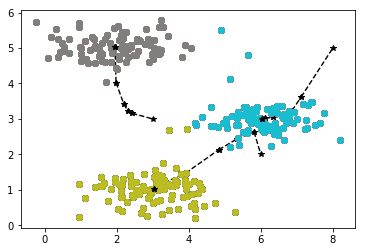

In [13]:
idx,centroids = runkMeans(X, initial_centroids,max_iters, True)

### Random initialization of centroids'
    

In [14]:
'''This function initializes K centroids that are to be 
%used in K-Means on the dataset X'''
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K,X.shape[1]))          
                                            #You should set centroids to randomly chosen examples from the dataset X
    randidx = np.random.permutation(len(X))    ## making a random permutation This allows the examples to be selected at 
                                           ##random without the risk of selecting the same example twice.
    centroids = X[randidx[0:K],:]     ## taking first K element out of that random X
    return centroids

In [15]:
centroids = kMeansInitCentroids(X, K)
(centroids)

array([[1.85776553, 4.86962414],
       [2.24185052, 4.9244617 ],
       [5.132009  , 2.19812195]])

## Image compression with K-means


In [16]:
'''In this exercise, you will use K-Means to compress an image. To do this,
%  you will first run K-Means on the colors of the pixels in the image and
%  then you will map each pixel onto its closest centroid.
%  '''


'In this exercise, you will use K-Means to compress an image. To do this,\n%  you will first run K-Means on the colors of the pixels in the image and\n%  then you will map each pixel onto its closest centroid.\n%  '

In [17]:

#load the image of bird given in dataset
#mat_contents = sio.loadmat(r"C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\bird_small.mat")
'''A = mat_contents['A']
print(A.shape)
print()
print(A)
''' ## simply loading the given matrix

"A = mat_contents['A']\nprint(A.shape)\nprint()\nprint(A)\n"

In [18]:
from PIL import Image
img = Image.open(r'C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\bird_small.png')
print( img.size, img.format)

(128, 128) PNG


In [19]:
imgplt = plt.imread(r'C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\20171124_221035.jpg')
## this function divides each value by 255 to get it into the range 0-1 
# but we will not use this
imgplt   

array([[[ 95,  77,  53],
        [ 95,  77,  53],
        [ 95,  77,  53],
        ...,
        [203, 191, 169],
        [203, 191, 169],
        [202, 190, 168]],

       [[ 95,  79,  56],
        [ 95,  79,  56],
        [ 95,  79,  56],
        ...,
        [204, 192, 170],
        [203, 191, 169],
        [203, 191, 169]],

       [[ 96,  81,  58],
        [ 96,  81,  58],
        [ 95,  80,  57],
        ...,
        [203, 191, 167],
        [204, 192, 168],
        [204, 192, 168]],

       ...,

       [[ 70,  44,  43],
        [ 72,  48,  46],
        [ 75,  51,  47],
        ...,
        [179, 172, 143],
        [173, 166, 137],
        [169, 160, 131]],

       [[ 69,  43,  44],
        [ 70,  44,  43],
        [ 70,  46,  42],
        ...,
        [182, 173, 144],
        [178, 169, 140],
        [173, 164, 135]],

       [[ 68,  42,  43],
        [ 67,  41,  40],
        [ 66,  42,  38],
        ...,
        [189, 179, 152],
        [188, 178, 151],
        [185, 175, 148]]

[[[202 190 168]
  [203 191 169]
  [204 192 168]
  ...
  [169 160 131]
  [173 164 135]
  [185 175 148]]

 [[203 191 169]
  [203 191 169]
  [204 192 168]
  ...
  [173 166 137]
  [178 169 140]
  [188 178 151]]

 [[203 191 169]
  [204 192 170]
  [203 191 167]
  ...
  [179 172 143]
  [182 173 144]
  [189 179 152]]

 ...

 [[ 95  77  53]
  [ 95  79  56]
  [ 95  80  57]
  ...
  [ 75  51  47]
  [ 70  46  42]
  [ 66  42  38]]

 [[ 95  77  53]
  [ 95  79  56]
  [ 96  81  58]
  ...
  [ 72  48  46]
  [ 70  44  43]
  [ 67  41  40]]

 [[ 95  77  53]
  [ 95  79  56]
  [ 96  81  58]
  ...
  [ 70  44  43]
  [ 69  43  44]
  [ 68  42  43]]]


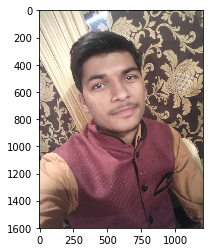

In [20]:
import imageio
A = imageio.imread(r'C:\Users\user\Documents\Machine learning\machine-learning-ex7\ex7\20171124_221035.jpg')
print(A)   ## print the pixel intensities
plt.imshow(A)

# since image is of 128 * 128 px, so each row contains 128 pxs and every pixel has 3 intensites i.e. red blue and green 

#ForEg, we have 185 in 1st row, 2nd column, since it is the 2nd value therefore it is green color intensity
A = A/255

In [21]:
img_size = A.shape

p = img_size[0]
q = img_size[1]
r = img_size[2]

X = A.reshape(p*q,3)

print('shape of X is',X.shape)

K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K)
initial_centroids


shape of X is (1920000, 3)


Image([[0.44313725, 0.37254902, 0.36470588],
       [0.96078431, 0.91372549, 0.82745098],
       [0.6745098 , 0.39607843, 0.45098039],
       [0.89803922, 0.85490196, 0.76862745],
       [0.70196078, 0.64705882, 0.59607843],
       [0.3372549 , 0.25098039, 0.16078431],
       [0.3372549 , 0.19215686, 0.21960784],
       [0.39215686, 0.30588235, 0.2627451 ],
       [0.74509804, 0.57254902, 0.5372549 ],
       [0.49019608, 0.26666667, 0.30196078],
       [0.6745098 , 0.4       , 0.44313725],
       [0.29803922, 0.16078431, 0.18823529],
       [0.43529412, 0.22745098, 0.29019608],
       [0.39215686, 0.25098039, 0.25098039],
       [0.98823529, 0.99215686, 0.87058824],
       [0.17647059, 0.15294118, 0.15294118]])

In [22]:
idx,centroids = runkMeans(X, initial_centroids,max_iters, False)
print(centroids)

[[0.49103291 0.40640003 0.36080328]
 [0.92762849 0.86095445 0.77645916]
 [0.68958309 0.40889409 0.4618412 ]
 [0.8530968  0.75961288 0.67634208]
 [0.79286061 0.67334633 0.59083312]
 [0.29316104 0.23418914 0.22481854]
 [0.33126036 0.184657   0.21863221]
 [0.39269901 0.33727203 0.32425347]
 [0.71788277 0.57576292 0.50826259]
 [0.55838077 0.31299824 0.36705359]
 [0.6200443  0.49417166 0.41781672]
 [0.24453714 0.16837118 0.18287096]
 [0.46324401 0.25124173 0.28850142]
 [0.35739678 0.26956718 0.26032487]
 [0.9824233  0.96339415 0.88551552]
 [0.13017714 0.11039615 0.11934409]]


## Image Compression

#### use the clusters of K-Means to compress an image. To do this, we first find the closest clusters   each example.

In [23]:
idx = findClosestCentroids(X, centroids)  #Find closest cluster members
idx = idx - 1
'''
Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
'''
X_recovered = centroids[idx]

#% Reshape the recovered image into proper dimensions

X_recovered = X_recovered.reshape(img_size[0],img_size[1],3)
X_recovered

array([[[0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        ...,
        [0.71788277, 0.57576292, 0.50826259],
        [0.71788277, 0.57576292, 0.50826259],
        [0.79286061, 0.67334633, 0.59083312]],

       [[0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        ...,
        [0.71788277, 0.57576292, 0.50826259],
        [0.71788277, 0.57576292, 0.50826259],
        [0.79286061, 0.67334633, 0.59083312]],

       [[0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        [0.8530968 , 0.75961288, 0.67634208],
        ...,
        [0.79286061, 0.67334633, 0.59083312],
        [0.79286061, 0.67334633, 0.59083312],
        [0.79286061, 0.67334633, 0.59083312]],

       ...,

       [[0.35739678, 0.26956718, 0.26032487],
        [0.35739678, 0.26956718, 0.26032487],
        [0.35739678, 0

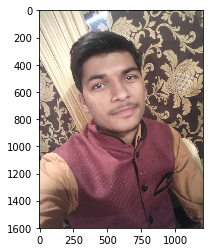

In [24]:
plt.imshow(A)


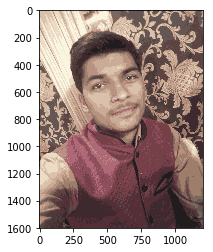

In [25]:
plt.imshow(X_recovered)
